# Task6

In [38]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")

cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [39]:
sample_data = [
    ("Headset", 2, 1500),
    ("Laptop", 1, 55000),
    ("USB Cable", 5, 250),
    ("Monitor", 2, 12000),
    ("Mouse", 3, 500),
    ("Printer", 1, 8000),
    ("Laptop", 2, 55000),
    ("Keyboard", 3, 800),
    ("Tablet", 1, 25000),
    ("Webcam", 2, 3000),
    ("Speaker", 3, 2000),
    ("Chair", 1, 7000),
    ("USB Cable", 10, 250),
    ("Headset", 4, 1500),
    ("Desk", 1, 12000),
    ("Monitor", 1, 12000),
    ("Mouse", 2, 500),
    ("Tablet", 3, 25000),
    ("Keyboard", 2, 800),
    ("SSD", 2, 5000),
    ("HDD", 1, 3500),
    ("Charger", 6, 600),
    ("Webcam", 1, 3000),
    ("Printer", 2, 8000),
    ("Laptop", 2, 55000),
    ("Mouse", 5, 500),
    ("Keyboard", 3, 800)
]

In [40]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?,?,?)", sample_data)
conn.commit()
conn.close()

print("sales_data.db created successfully!")

sales_data.db created successfully!


In [41]:
conn1 = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, SUM(quantity) AS total_quantity, SUM(quantity * price) AS total_revenue
FROM sales GROUP BY product
"""

df = pd.read_sql_query(query, conn1)

conn1.close()

In [42]:
print("Sales Summary:\n")
print(df)

Sales Summary:

      product  total_quantity  total_revenue
0       Chair               1         7000.0
1     Charger               6         3600.0
2        Desk               1        12000.0
3         HDD               1         3500.0
4     Headset               6         9000.0
5    Keyboard               8         6400.0
6      Laptop               5       275000.0
7     Monitor               3        36000.0
8       Mouse              10         5000.0
9     Printer               3        24000.0
10        SSD               2        10000.0
11    Speaker               3         6000.0
12     Tablet               4       100000.0
13  USB Cable              15         3750.0
14     Webcam               3         9000.0


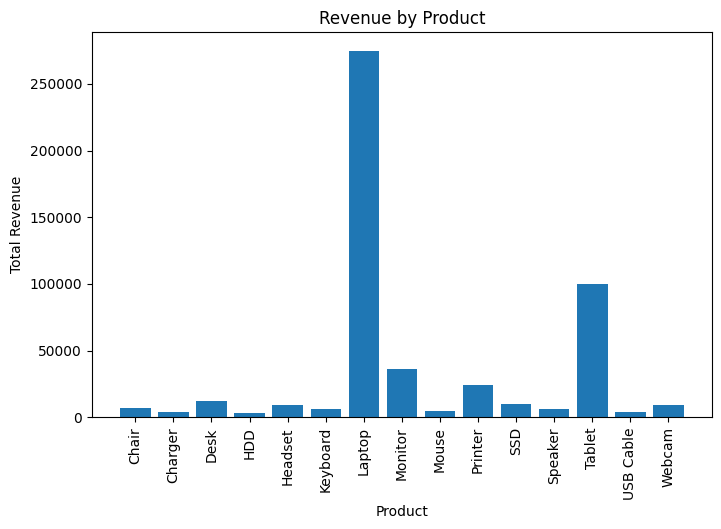

In [43]:
plt.figure(figsize=(8,5))
plt.bar(df["product"], df["total_revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()